### Bibliotheken

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from os.path import join

### Datei-Import

In [10]:
data = np.loadtxt(join("..", "data", "imu", "pickup2_till.csv"), delimiter=";")
# subtract start delay from time stamps
data[:,0] = data[:,0]-data[0,0]
#convert milliseconds into seconds:
data[:,0]=data[:,0]*0.001

# basic properties of the data series
sample_interval = 0.02
sample_freq = 1.0/sample_interval
sample_num = np.shape(data[:,0])[0]
sample_time = sample_num*sample_interval

# The Signals

## Accelerometer & Gyroscope

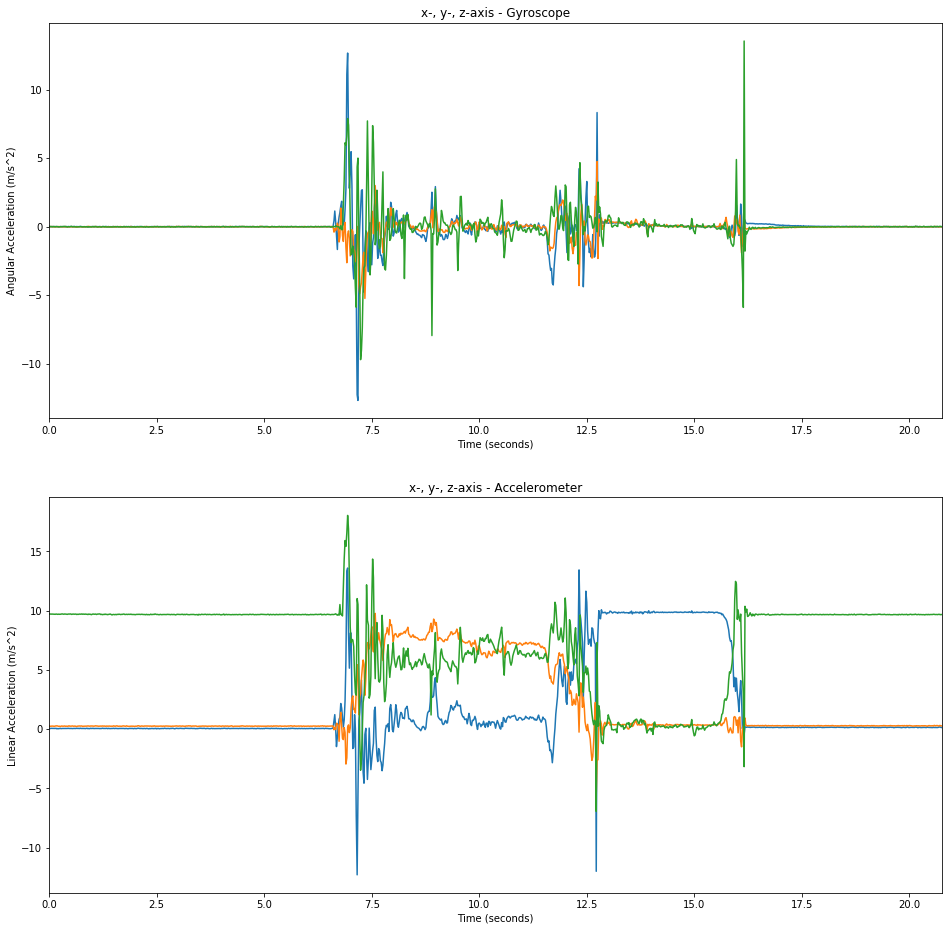

In [13]:
plt.figure(figsize=(16, 16))
plt.subplot(2,1,1)
plt.title('x-, y-, z-axis - Gyroscope')
plt.xlabel('Time (seconds)')
plt.ylabel('Angular Acceleration (m/s^2)')
plt.plot(data[:,0], data[:,4:-8])
plt.xlim(data[0,0],data[-1,0])

plt.subplot(2,1,2)
plt.title('x-, y-, z-axis - Accelerometer')
plt.xlabel('Time (seconds)')
plt.ylabel('Linear Acceleration (m/s^2)')
plt.plot(data[:,0],data[:,1:-11])
plt.xlim(data[0,0],data[-1,0])
None

# Signal Statistic

## Univariate Statistic

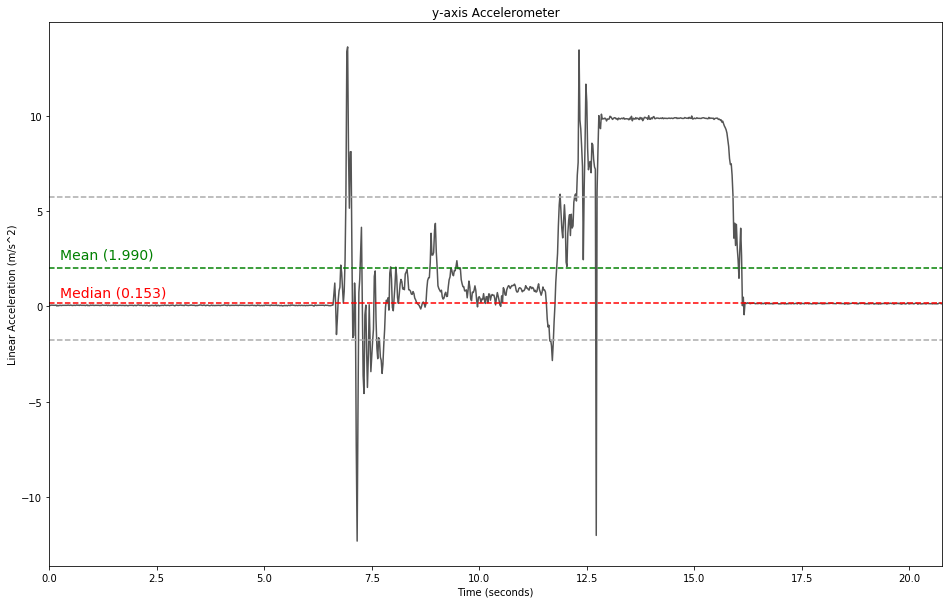

In [14]:
# calculate mean and create vector for plotting
mean = np.mean(data[:,1])
# median 
median = np.median(data[:,1])
# standard deviation
std = np.std(data[:,1])

# plot the signal
plt.figure(figsize=(16, 10))
plt.title('y-axis Accelerometer')
plt.xlabel('Time (seconds)')
plt.ylabel('Linear Acceleration (m/s^2)')
plt.plot(data[:,0],data[:,1], label='x-axis', color='#555555')
plt.xlim(data[0,0],data[-1,0])

# mean line
plt.axhline(y=mean, color='g', ls='dashed')
plt.annotate('Mean ({0:.3f})'.format(mean), xy=(2, 1), xytext=(0.25, 2.5), fontsize=14, color='g')

# standard deviation line
plt.axhline(y=mean+std, color='#aaaaaa', ls='dashed')
plt.axhline(y=mean-std, color='#aaaaaa', ls='dashed')

# median line
plt.axhline(y=median, color='r', ls='dashed')
plt.annotate('Median ({0:.3f})'.format(median), xy=(2, 1), xytext=(0.25, 0.5), fontsize=14, color='r')

None

### Standardized & Accumulated Histogram

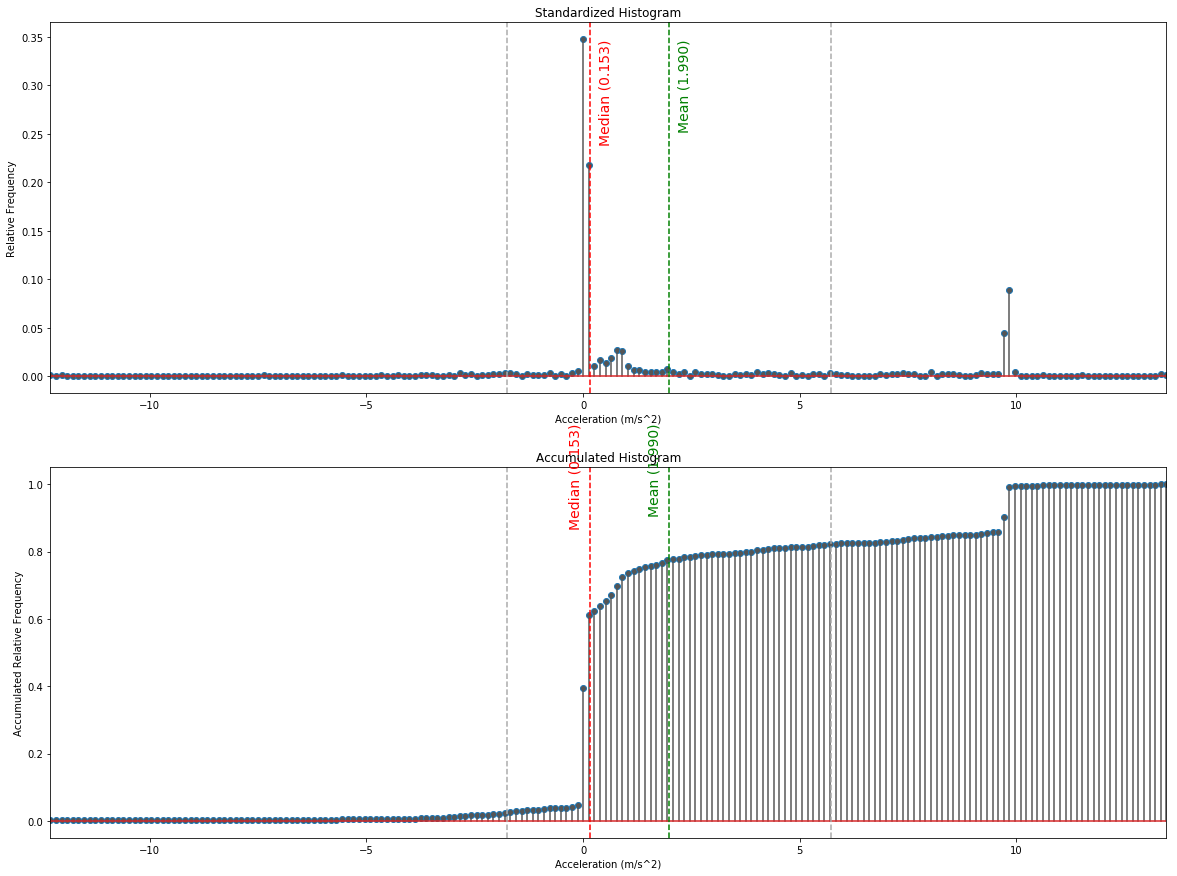

In [16]:
# calculate the normalized counts in each bin
hist_cnt, hist_idx = np.histogram(data[:,1], bins=200)
hist_cnt = hist_cnt/np.sum(hist_cnt)
hist_max = np.max(hist_cnt)

prev_cnt = hist_cnt[0]
hist_cum = np.zeros(len(hist_cnt))
for i_cnt in range(len(hist_cnt)):
    prev_cnt = hist_cum[i_cnt] = hist_cnt[i_cnt]+prev_cnt
hist_cum_max = np.max(hist_cum)


plt.figure(figsize=(20,15))

# plot the histogram
plt.subplot(2,1,1)
plt.title('Standardized Histogram')
plt.xlabel('Acceleration (m/s^2)')
plt.ylabel('Relative Frequency')
plt.xlim(hist_idx[0],hist_idx[-2])
markerline, stemlines, baseline = plt.stem(hist_idx[0:-1], hist_cnt)
plt.setp(markerline, markerfacecolor='#555555')
plt.setp(stemlines, color='#555555')
# mean line
plt.axvline(x=mean, color='g', ls='dashed')
plt.annotate('Mean ({0:.3f})'.format(mean), xy=(0, 0), xytext=(mean+0.2, hist_max*0.97), 
             fontsize=14, color='g', rotation=90)
# standard deviation line
plt.axvline(x=mean+std, color='#aaaaaa', ls='dashed')
plt.axvline(x=mean-std, color='#aaaaaa', ls='dashed')
# median line
plt.axvline(x=median, color='r', ls='dashed')
plt.annotate('Median ({0:.3f})'.format(median), xy=(0, 0), xytext=(median+0.2, hist_max*0.97), 
             fontsize=14, color='r', rotation=90)


# plot the cumulative histogram
plt.subplot(2,1,2)
plt.title('Accumulated Histogram')
plt.xlabel('Acceleration (m/s^2)')
plt.ylabel('Accumulated Relative Frequency')
plt.xlim(hist_idx[0],hist_idx[-2])
markerline, stemlines, baseline = plt.stem(hist_idx[0:-1], hist_cum)
plt.setp(markerline, markerfacecolor='#555555')
plt.setp(stemlines, color='#555555')
# mean line
plt.axvline(x=mean, color='g', ls='dashed')
plt.annotate('Mean ({0:.3f})'.format(mean), xy=(0, 0), xytext=(mean-0.5, hist_cum_max*1.15), 
             fontsize=14, color='g', rotation=90)
# standard deviation line
plt.axvline(x=mean+std, color='#aaaaaa', ls='dashed')
plt.axvline(x=mean-std, color='#aaaaaa', ls='dashed')
# median line
plt.axvline(x=median, color='r', ls='dashed')
plt.annotate('Median ({0:.3f})'.format(median), xy=(0, 0), xytext=(median-0.5, hist_cum_max*1.15), 
             fontsize=14, color='r', rotation=90)
None

### Normal, Central and Standardized Central Moments

In [17]:
num_raw = 5
num_central = 5
m_raw = np.zeros(num_raw)
m_central = np.zeros(num_central)
m_norm = np.zeros(num_central)
inv_len = np.divide(1.0,np.shape(data[:,1])[0])

for k in range(0, num_raw):
    m_raw[k] = np.multiply(np.sum(np.power(data[:,1], k)), inv_len)
    print("{0}. normal moment: {1:8.3f} (m/s^2)^{0}".format(k, m_raw[k]))

print("\n")
for k in range(0, num_central):
    m_central[k] = np.multiply(np.sum(np.power(np.subtract(data[:,1], m_raw[1]), k)), inv_len)
    print("{0}. central moment: {1:8.3f} (m/s^2)^{0}".format(k, m_central[k]))
    
print("\n")
for k in range(0, num_central):
    m_norm[k] = np.divide(m_central[k], np.sqrt(np.power(m_central[2], k)))
    print("{0}. standardized central moment: {1:8.3f}".format(k, m_norm[k]))

0. normal moment:    1.000 (m/s^2)^0
1. normal moment:    1.990 (m/s^2)^1
2. normal moment:   17.942 (m/s^2)^2
3. normal moment:  159.736 (m/s^2)^3
4. normal moment: 1646.641 (m/s^2)^4


0. central moment:    1.000 (m/s^2)^0
1. central moment:   -0.000 (m/s^2)^1
2. central moment:   13.982 (m/s^2)^2
3. central moment:   68.383 (m/s^2)^3
4. central moment:  754.406 (m/s^2)^4


0. standardized central moment:    1.000
1. standardized central moment:   -0.000
2. standardized central moment:    1.000
3. standardized central moment:    1.308
4. standardized central moment:    3.859


The distribution is left skew and the distribution is not "flat-topped" as the 4th standardized central moment is > 3 (the 4th standardized moment of the normal distribution).

### Entropy

In [18]:
hist_cnt, hist_idx = np.histogram(data[:,1], bins=200000)
hist_cnt = hist_cnt/np.sum(hist_cnt)
entropy = -np.sum(np.multiply(hist_cnt, np.log2(hist_cnt+0.000000001)))
print("Entropy: {0:.2f} bit/symbol".format(entropy))

Entropy: 8.44 bit/symbol


### Check for Stationary or Ergodic System


	 	 H1 	 H2
Mean: 		 0.295 	 3.688
Variance: 	 2.401 	 19.827




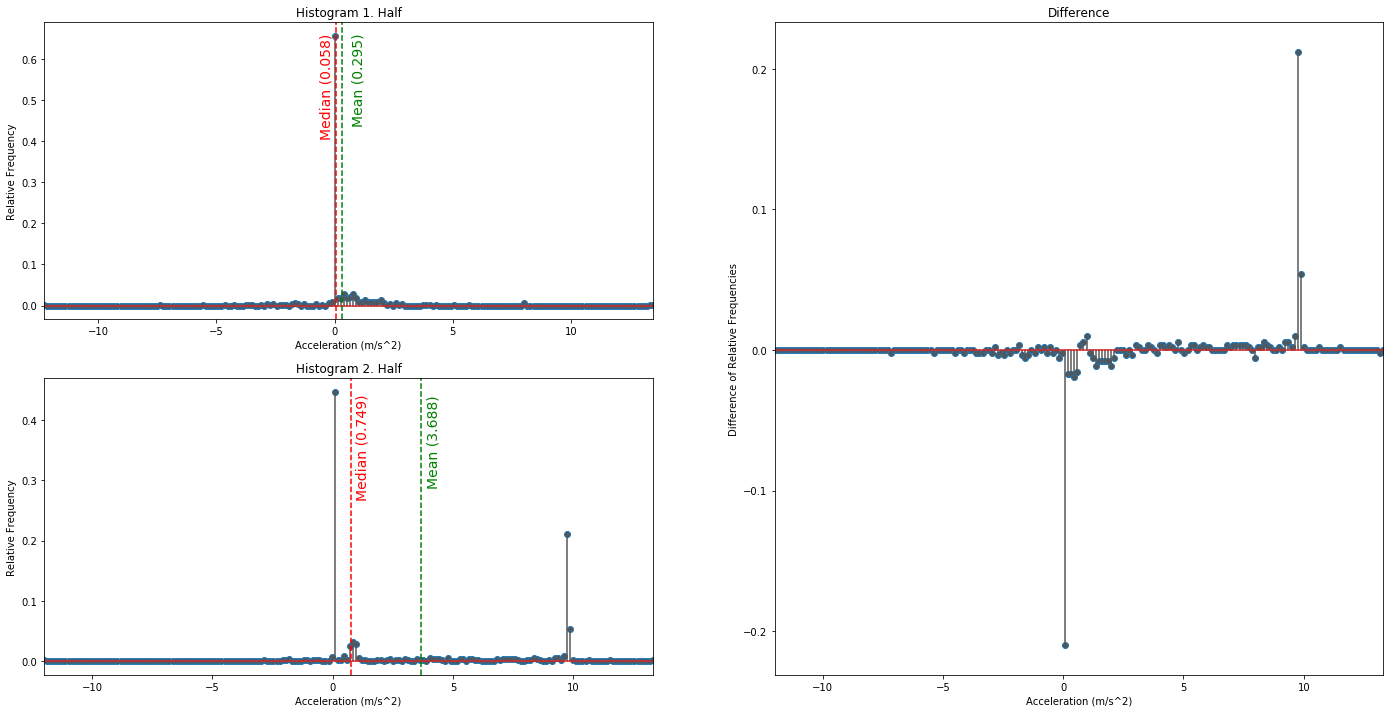

In [20]:
# calculate the normalized counts in each bin
hist_cnt1, hist_idx1 = np.histogram(data[:np.int32(len(data[:,1])/2),1], bins=200)
hist_cnt2, hist_idx2 = np.histogram(data[np.int32(len(data[:,1])/2)+1:,1], bins=200)
hist_cnt1 = hist_cnt1/np.sum(hist_cnt1)
hist_cnt2 = hist_cnt2/np.sum(hist_cnt2)
hist_max1 = np.max(hist_cnt1)
hist_max2 = np.max(hist_cnt2)
hist_mean1 = np.mean(data[:np.int32(len(data[:,1])/2),1])
hist_mean2 = np.mean(data[np.int32(len(data[:,1])/2)+1:,1])
hist_median1 = np.median(data[:np.int32(len(data[:,1])/2),1])
hist_median2 = np.median(data[np.int32(len(data[:,1])/2)+1:,1])
hist_var1 = np.var(data[:np.int32(len(data[:,1])/2),1])
hist_var2 = np.var(data[np.int32(len(data[:,1])/2)+1:,1])

print('\n\t \t H1 \t H2\nMean: \t\t {0:.3f} \t {1:.3f}\nVariance: \t {2:.3f} \t {3:.3f}\n\n'
     .format(hist_mean1, hist_mean2, hist_var1, hist_var2))

# plot the histogram1
plt.figure(figsize=(24,12))
plt.subplot2grid((2,2), (0, 0))
plt.title('Histogram 1. Half')
plt.xlabel('Acceleration (m/s^2)')
plt.ylabel('Relative Frequency')
plt.xlim(hist_idx1[0],hist_idx1[-2])
markerline1, stemlines1, baseline1 = plt.stem(hist_idx1[0:-1], hist_cnt1)
plt.setp(markerline1, markerfacecolor='#555555')
plt.setp(stemlines1, color='#555555')
# mean line
plt.axvline(x=hist_mean1, color='g', ls='dashed')
plt.annotate('Mean ({0:.3f})'.format(hist_mean1), xy=(0, 0), xytext=(hist_mean1+0.4, hist_max1*0.97), 
             fontsize=14, color='g', rotation=90)
# median lin
plt.axvline(x=hist_median1, color='r', ls='dashed')
plt.annotate('Median ({0:.3f})'.format(hist_median1), xy=(0, 0), xytext=(hist_median1-0.7, hist_max1*0.97), 
             fontsize=14, color='r', rotation=90)

# plot the histogram2
plt.subplot2grid((2,2), (1, 0))
plt.title('Histogram 2. Half')
plt.xlabel('Acceleration (m/s^2)')
plt.ylabel('Relative Frequency')
plt.xlim(hist_idx2[0],hist_idx2[-2])
markerline2, stemlines2, baseline2 = plt.stem(hist_idx2[0:-1], hist_cnt2)
plt.setp(markerline2, markerfacecolor='#555555')
plt.setp(stemlines2, color='#555555')
# mean line
plt.axvline(x=hist_mean2, color='g', ls='dashed')
plt.annotate('Mean ({0:.3f})'.format(hist_mean2), xy=(0, 0), xytext=(hist_mean2+0.2, hist_max2*0.95), 
             fontsize=14, color='g', rotation=90)
# median lin
plt.axvline(x=hist_median2, color='r', ls='dashed')
plt.annotate('Median ({0:.3f})'.format(hist_median2), xy=(0, 0), xytext=(hist_median2+0.2, hist_max2*0.95), 
             fontsize=14, color='r', rotation=90)

# plot the histogram3 - diff
plt.subplot2grid((2,2), (0, 1), rowspan=2)
plt.title('Difference')
plt.xlabel('Acceleration (m/s^2)')
plt.ylabel('Difference of Relative Frequencies')
plt.xlim(hist_idx2[0],hist_idx2[-2])
markerline2, stemlines2, baseline2 = plt.stem(hist_idx2[0:-1], hist_cnt2-hist_cnt1)
plt.setp(markerline2, markerfacecolor='#555555')
plt.setp(stemlines2, color='#555555')
None

## Multivariate Statistic

### Correlation

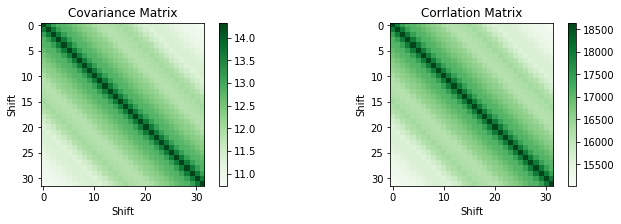

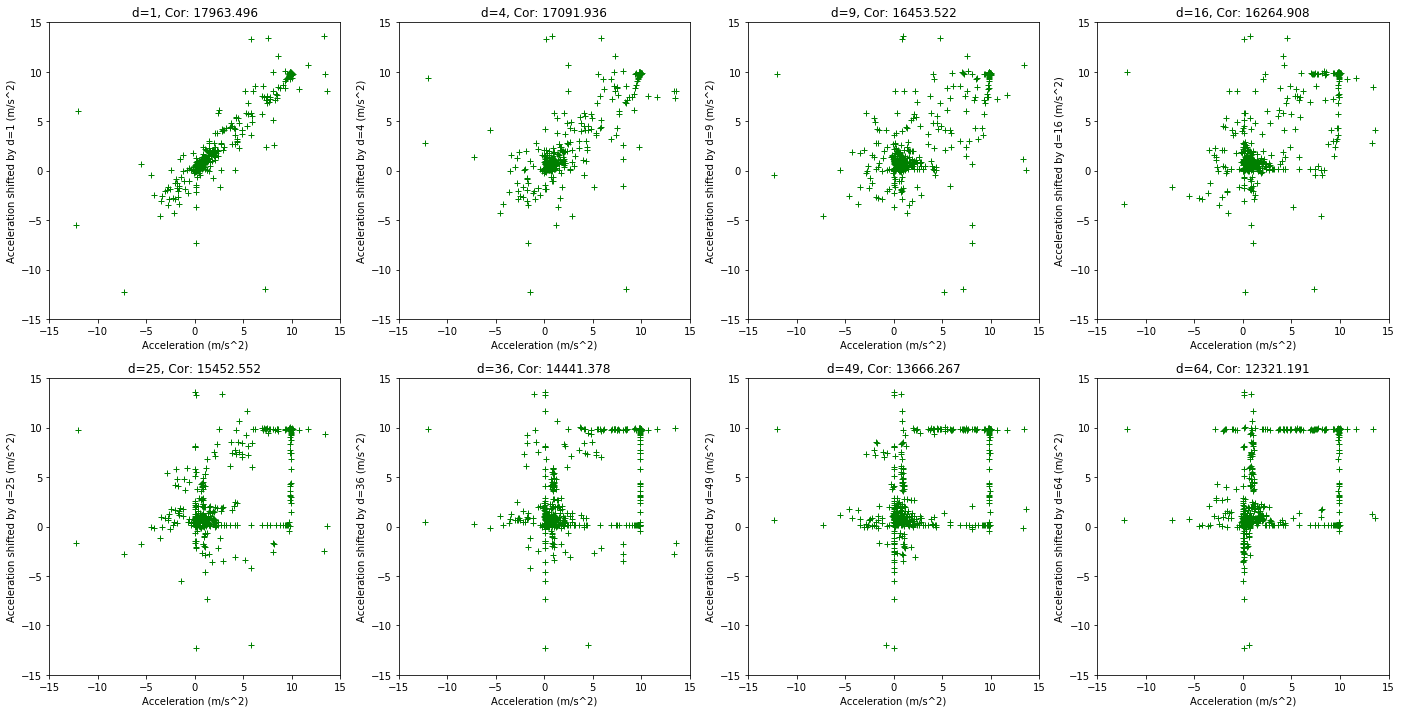

In [21]:
# TODO: Cov, Cor with other accelerometer axis
num_shifts = 32
corr_matrix = np.zeros((num_shifts, num_shifts))
cov_matrix = np.zeros((num_shifts, num_shifts))
cov_input = np.zeros((num_shifts,len(data[:-num_shifts])))
for i in range(num_shifts):
    cov_input[i,:] = data[i:-num_shifts+i,1]
    for j in range(num_shifts):
        corr_matrix[i][j] = np.correlate(data[i:-num_shifts+i,1], data[j:-num_shifts+j,1])
cov_matrix = np.cov(cov_input)

plt.figure(figsize=(24, 3))
plt.subplot(1, 4, 1)
plt.title('Covariance Matrix')
plt.xlabel('Shift')
plt.ylabel('Shift')
plt.imshow(cov_matrix, cmap=plt.get_cmap('Greens'), interpolation='none')

plt.colorbar()
plt.subplot(1, 4, 2)
plt.title('Corrlation Matrix')
plt.xlabel('Shift')
plt.ylabel('Shift')
plt.imshow(corr_matrix, cmap=plt.get_cmap('Greens'), interpolation='none')
plt.colorbar()

plt.figure(figsize=(24, 12))
for s in range(1,9):
    shift = s*s
    plt.subplot(2, 4, s)
    plt.title('d={0}, Cor: {1:.3f}'.format(shift, np.correlate(data[:-shift,1], data[shift:,1])[0]))
    plt.xlabel('')
    plt.plot(data[:-shift,1], data[shift:,1], linestyle='', marker='+', color='g')
    plt.xlabel('Acceleration (m/s^2)')
    plt.ylabel('Acceleration shifted by d={0} (m/s^2)'.format(shift))
    plt.xlim(-15,15)
    plt.ylim(-15,15)
None

# Convolution in the Time Domain

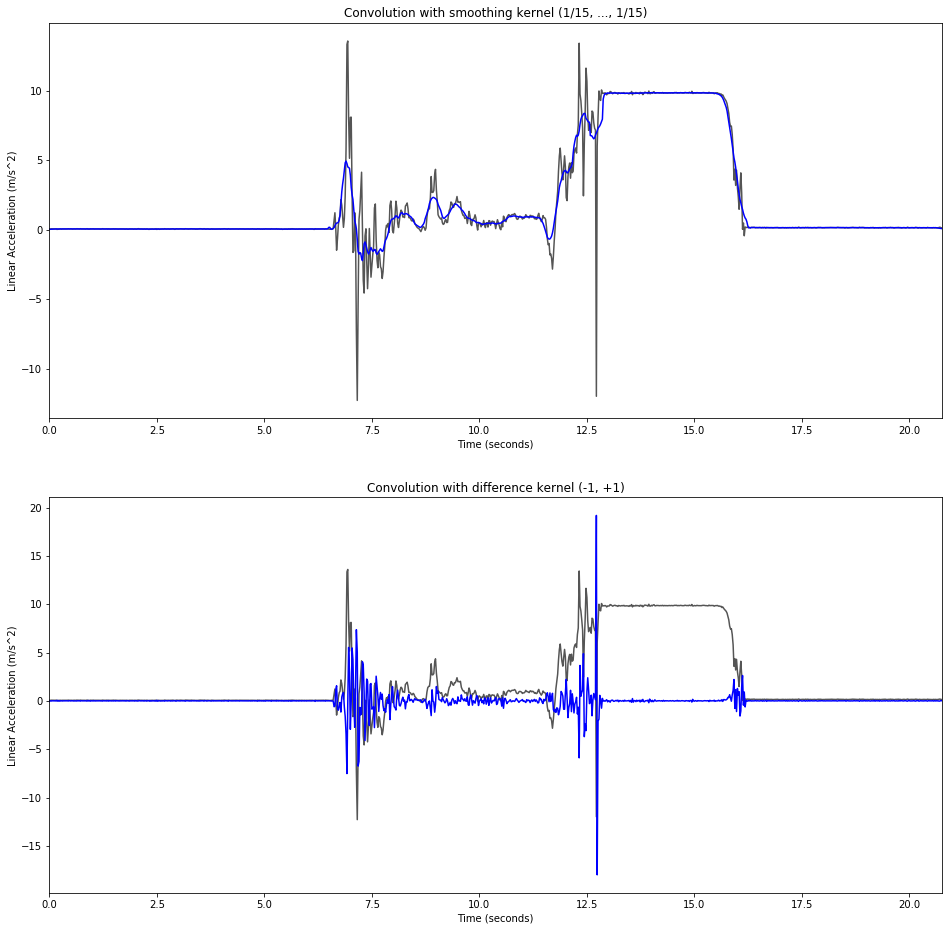

In [22]:
smoothing_factor = 15
change_conv = np.convolve(data[:,1], (-1, 1), mode='same')
smooth_conv = np.convolve(data[:,1], np.multiply(np.ones(smoothing_factor), 1/smoothing_factor), mode='same')

plt.figure(figsize=(16, 16))

plt.subplot(2,1,1)
plt.title('Convolution with smoothing kernel (1/{0}, ..., 1/{0})'.format(smoothing_factor))
plt.plot(data[:,0], data[:,1], color='#555555')
plt.plot(data[:,0], smooth_conv[:], color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('Linear Acceleration (m/s^2)')
plt.xlim(data[0,0], data[-1,0])

plt.subplot(2,1,2)
plt.title('Convolution with difference kernel (-1, +1)')
plt.plot(data[:,0], data[:,1], color='#555555')
plt.plot(data[:,0], change_conv[:], color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('Linear Acceleration (m/s^2)')
plt.xlim(data[0,0], data[-1,0])
None

# Frequency Domain

In [23]:
# Nuttall Window
a0 = 0.355768
a1 = 0.487396
a2 = 0.144232
a3 = 0.012604

n = np.arange(0,sample_num)
c1 = (2.0*np.pi)/(sample_num-1)

window_nuttall = a0 - a1*np.cos(np.multiply(n,c1)) \
                    + a2*np.cos(np.multiply(n,2.0*c1)) \
                    - a3*np.cos(np.multiply(n,3.0*c1))

In [24]:
data_ft = np.fft.fft(data[:,1])
ft_freq = np.fft.fftfreq(n=data[:,1].shape[-1], d=(data[:,0][120]-data[:,0][119]))

# frequency in linear order
ft_lin_freq = np.concatenate([ft_freq[np.int32(sample_num/2.0):], ft_freq[:np.int32(sample_num/2.0)]])
# distance beween samples in frequency domain (cycles per second)
ft_delta_w = ft_freq[1]-ft_freq[0]

### Signal Statistic in the Frequency Domain

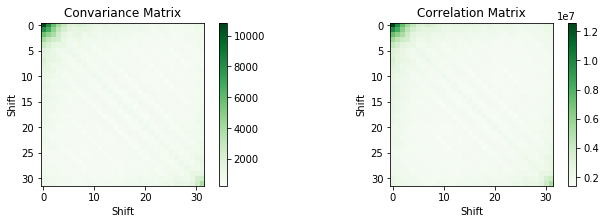

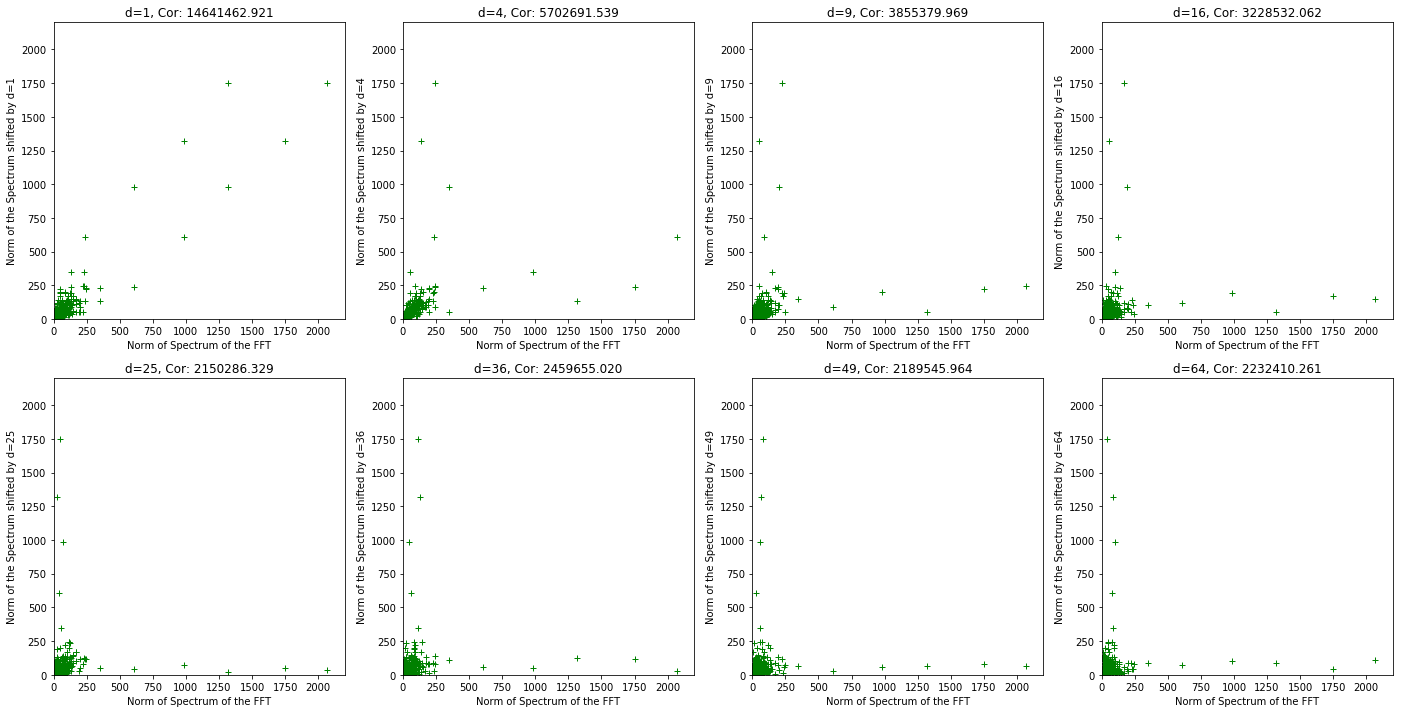

In [26]:
num_shifts = 32
corr_matrix = np.zeros((num_shifts, num_shifts))
cov_matrix = np.zeros((num_shifts, num_shifts))
cov_input = np.zeros((num_shifts,len(data_ft[:-num_shifts])))
for i in range(num_shifts):
    cov_input[i,:] = np.absolute(data_ft[i:-num_shifts+i])
    for j in range(num_shifts):
        corr_matrix[i][j] = np.correlate(np.absolute(data_ft[i:-num_shifts+i]), 
                                         np.absolute(data_ft[j:-num_shifts+j]))[0]
cov_matrix = np.cov(cov_input)

plt.figure(figsize=(24, 3))

plt.subplot(1, 4, 1)
plt.title('Convariance Matrix')
plt.xlabel('Shift')
plt.ylabel('Shift')
plt.imshow(cov_matrix, cmap=plt.get_cmap('Greens'), interpolation='none')
plt.colorbar()

plt.subplot(1, 4, 2)
plt.title('Correlation Matrix')
plt.xlabel('Shift')
plt.ylabel('Shift')
plt.imshow(corr_matrix, cmap=plt.get_cmap('Greens'), interpolation='none')
plt.colorbar()

plt.figure(figsize=(24, 12))
for s in range(1,9):
    shift = s*s
    plt.subplot(2, 4, s)
    plt.title('d={0}, Cor: {1:.3f}'
              .format(shift, np.correlate(np.absolute(data_ft[:-shift]), np.absolute(data_ft[shift:]))[0]))
    plt.xlabel('Norm of Spectrum of the FFT')
    plt.ylabel('Norm of the Spectrum shifted by d={0}'.format(shift))
    plt.plot(np.absolute(data_ft[:-shift]), np.absolute(data_ft[shift:]), linestyle='', marker='+', color='g')
    plt.xlim(0,2200)
    plt.ylim(0,2200)
None

## Low-Pass Filtering - Box Filter

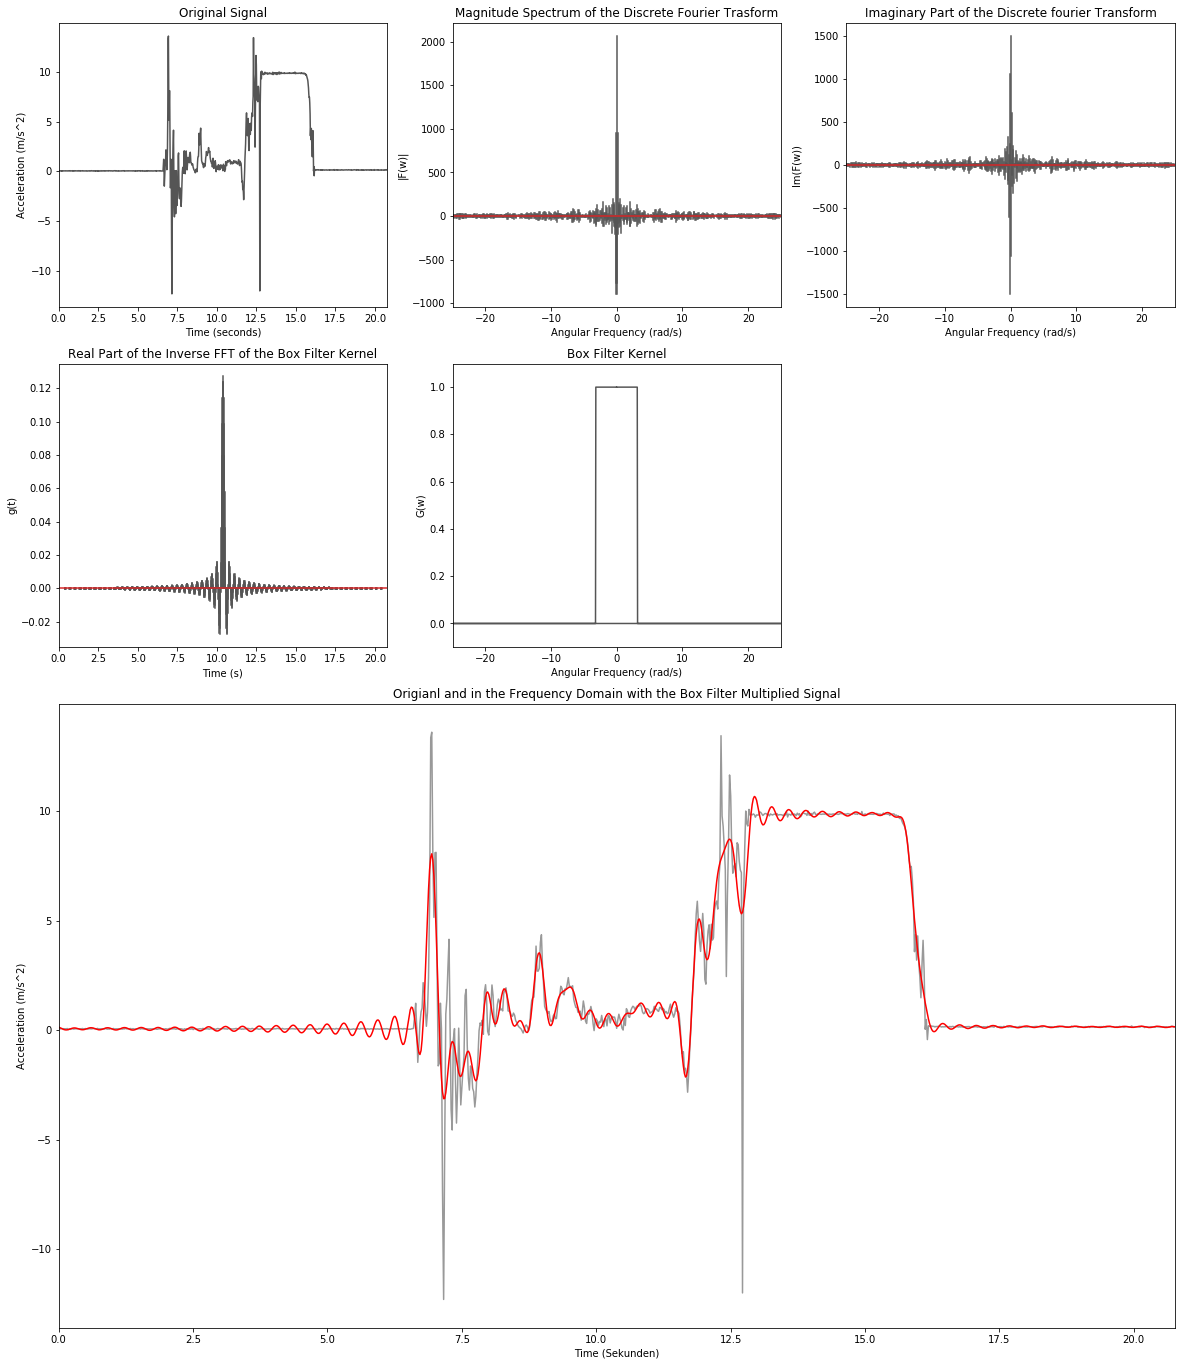

In [30]:
low_cut_freq = 20 # Hz
low_cut_omega = low_cut_freq/(2.0*np.pi)
low_idx = np.int32(low_cut_omega/ft_delta_w)

low_rect = np.zeros(sample_num)
low_rect[:low_idx] = 1.0
low_rect[-low_idx:] = 1.0

data_inv = np.fft.ifft(np.multiply(data_ft, low_rect))
low_inv = np.fft.ifft(low_rect)
low_inv = np.concatenate([low_inv[np.int32(sample_num/2.0):], low_inv[:np.int32(sample_num/2.0)]])


plt.figure(figsize=(20,24))

# 1. Zeile
plt.subplot2grid((4,3), (0,0))
plt.title('Original Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.plot(data[:,0], data[:,1], color='#555555')
plt.xlim(np.min(data[:,0]), np.max(data[:,0]))

plt.subplot2grid((4,3), (0,1))
plt.title('Magnitude Spectrum of the Discrete Fourier Trasform')
plt.xlabel('Angular Frequency (rad/s)')
plt.ylabel('|F(w)|')
markerline_ft, stemlines_ft, baseline_ft = plt.stem(ft_freq, data_ft.real, markerfmt=' ')
plt.setp(stemlines_ft, color='#555555')
plt.xlim(np.min(ft_freq),np.max(ft_freq))

plt.subplot2grid((4,3), (0,2))
plt.title('Phase Spectrum of the Discrete Fourier Transform')
plt.xlabel('Angular Frequency (rad/s)')
plt.ylabel('Im(F(w))')
markerline_ft, stemlines_ft, baseline_ft = plt.stem(ft_freq, data_ft.imag, markerfmt=' ')
plt.setp(stemlines_ft, color='#555555')
plt.xlim(np.min(ft_freq),np.max(ft_freq))

# 2. Zeile
plt.subplot2grid((4,3), (1,0))
plt.title('Real Part of the Inverse FFT of the Box Filter Kernel')
plt.xlabel('Time (s)')
plt.ylabel('g(t)')
markerline_ft, stemlines_ft, baseline_ft = plt.stem(data[:,0], low_inv.real, markerfmt=' ')
plt.setp(stemlines_ft, color='#555555')
plt.xlim(np.min(data[:,0]),np.max(data[:,0]))

plt.subplot2grid((4,3), (1,1))
plt.title('Box Filter Kernel')
plt.xlabel('Angular Frequency (rad/s)')
plt.ylabel('G(w)')
plt.plot(ft_freq, low_rect, color='#555555')
plt.xlim(np.min(ft_freq),np.max(ft_freq))
plt.ylim(-0.1, 1.1)

# 3. & 4. Zeile
plt.subplot2grid((4,3), (2,0), colspan=3, rowspan=2)
plt.title('Origianl and in the Frequency Domain with the Box Filter Multiplied Signal')
plt.xlabel('Time (Sekunden)')
plt.ylabel('Acceleration (m/s^2)')
plt.plot(data[:,0], data[:,1], color='#999999')
plt.plot(data[:,0], data_inv.real, color='r')
plt.xlim(np.min(data[:,0]), np.max(data[:,0]))
None

### Low-Pass Filtering - Butterworth Filter

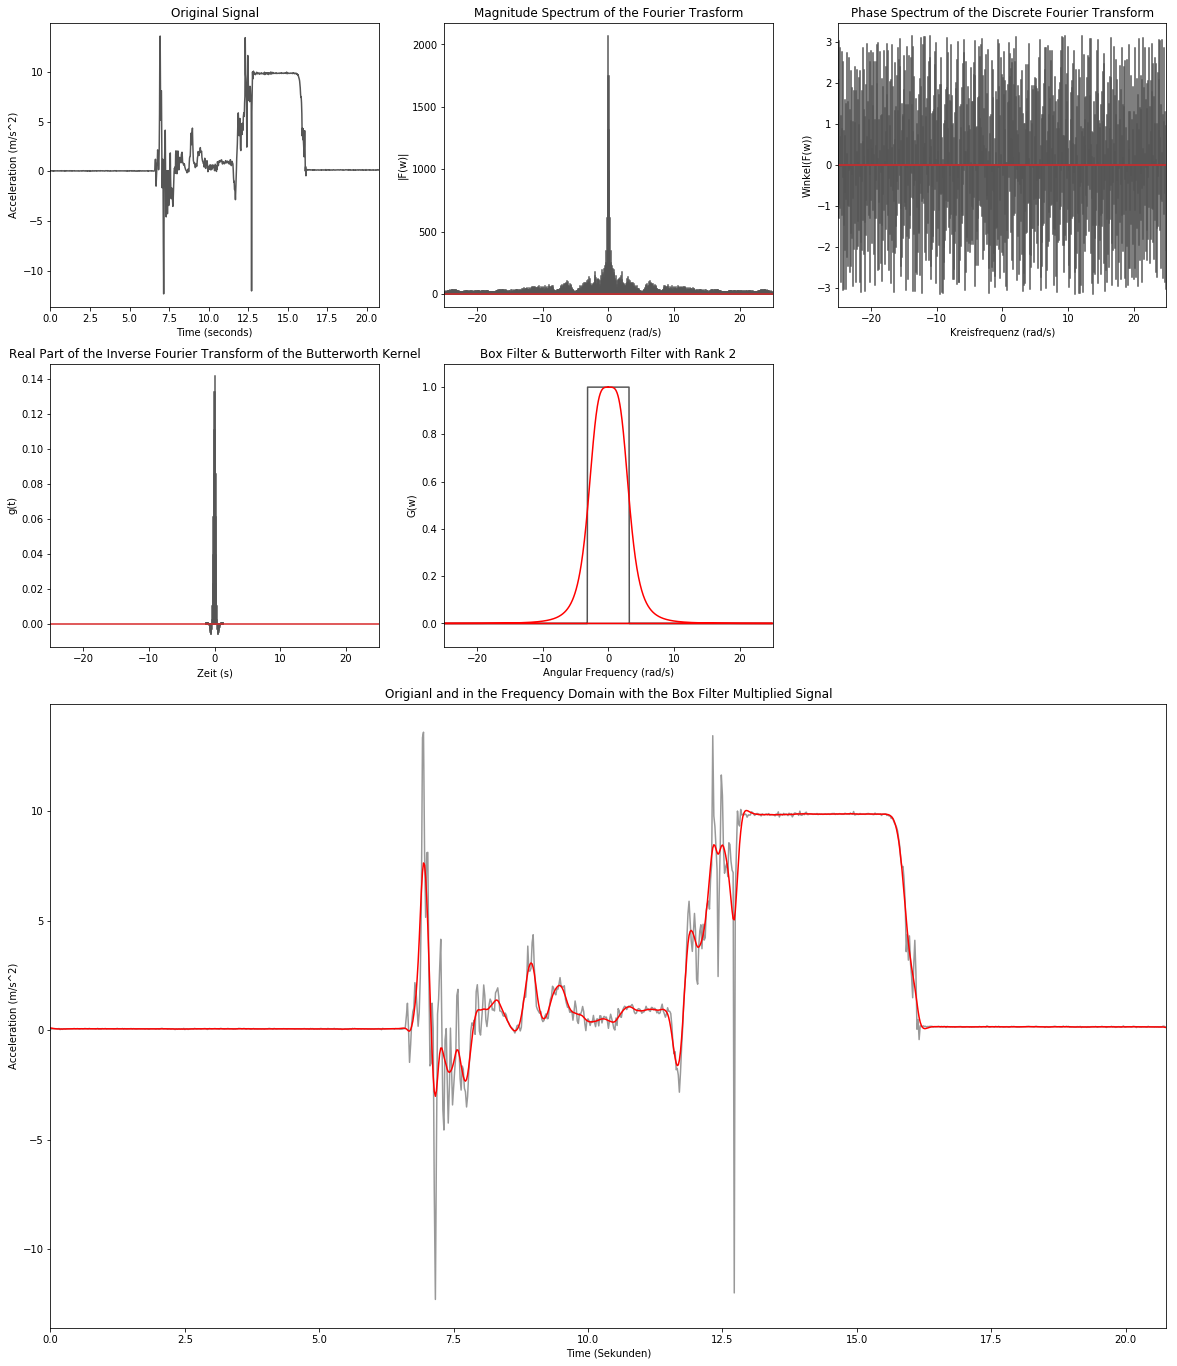

In [31]:
butter_order = 2
butterworth = 1/(1+np.power(np.divide(ft_lin_freq, low_cut_omega), 2.0*butter_order))
low_butter = np.concatenate([butterworth[np.int32(sample_num/2.0):], butterworth[:np.int32(sample_num/2.0)]])

data_inv = np.fft.ifft(np.multiply(data_ft, low_butter))
butter_inv = np.fft.ifft(low_butter)


plt.figure(figsize=(20,24))

# 1. Zeile
plt.subplot2grid((4,3), (0,0))
plt.title('Original Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.plot(data[:,0], data[:,1], color='#555555')
plt.xlim(np.min(data[:,0]), np.max(data[:,0]))

plt.subplot2grid((4,3), (0,1))
plt.title('Magnitude Spectrum of the Fourier Trasform')
plt.xlabel('Kreisfrequenz (rad/s)')
plt.ylabel('|F(w)|')
markerline_ft, stemlines_ft, baseline_ft = plt.stem(ft_freq, np.absolute(data_ft), markerfmt=' ')
plt.setp(stemlines_ft, color='#555555')
plt.xlim(np.min(ft_freq),np.max(ft_freq))

plt.subplot2grid((4,3), (0,2))
plt.title('Phase Spectrum of the Discrete Fourier Transform')
plt.xlabel('Kreisfrequenz (rad/s)')
plt.ylabel('Winkel(F(w))')
markerline_ft, stemlines_ft, baseline_ft = plt.stem(ft_freq, np.angle(data_ft), markerfmt=' ')
plt.setp(stemlines_ft, color='#555555')
plt.xlim(np.min(ft_freq),np.max(ft_freq))

# 2. Zeile
plt.subplot2grid((4,3), (1,0))
plt.title('Real Part of the Inverse Fourier Transform of the Butterworth Kernel')
plt.xlabel('Zeit (s)')
plt.ylabel('g(t)')
markerline_ft, stemlines_ft, baseline_ft = plt.stem(ft_freq, butter_inv.real, markerfmt=' ')
plt.setp(stemlines_ft, color='#555555')
plt.xlim(np.min(ft_freq),np.max(ft_freq))

plt.subplot2grid((4,3), (1,1))
plt.title('Box Filter & Butterworth Filter with Rank {0}'.format(butter_order))
plt.xlabel('Angular Frequency (rad/s)')
plt.ylabel('G(w)')
plt.plot(ft_freq, low_rect, color='#555555')
plt.plot(ft_freq, low_butter, color='r')
plt.xlim(np.min(ft_freq),np.max(ft_freq))
plt.ylim(-0.1, 1.1)

# 3. & 4. Zeile
plt.subplot2grid((4,3), (2,0), colspan=3, rowspan=2)
plt.title('Origianl and in the Frequency Domain with the Box Filter Multiplied Signal')
plt.xlabel('Time (Sekunden)')
plt.ylabel('Acceleration (m/s^2)')
plt.plot(data[:,0], data[:,1], color='#999999')
plt.plot(data[:,0], data_inv.real, color='r')
plt.xlim(np.min(data[:,0]), np.max(data[:,0]))
None

### Butterworth in Time & Frequency Domain

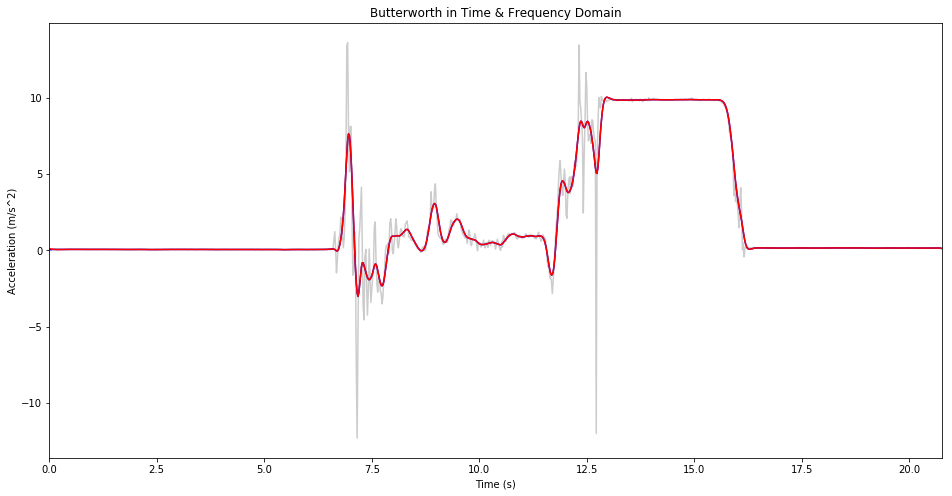

In [32]:
butter_conv = np.convolve(data[:,1], 
                          np.concatenate([butter_inv[np.int32(sample_num/2.0):], 
                                          butter_inv[:np.int32(sample_num/2.0)]]).real, 
                          mode='same')

plt.figure(figsize=(16,8))
plt.title('Butterworth in Time & Frequency Domain')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.plot(data[:,0], data[:,1], color='#cccccc')
plt.plot(data[1:,0], butter_conv[1:], color='b')
plt.plot(data[1:,0], data_inv.real[:-1], color='r')
plt.xlim(data[0,0], data[-1,0])

None